In [1]:
%load_ext autoreload
%autoreload 2

## Plot some of the characteristics of the Southern Ocean state in OM4

In [2]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from xhistogram.xarray import histogram
import gsw
import wmt_bgc.basic as wmt
import fastjmd95 as jmd95
%matplotlib inline

In [17]:
# Load the data
# (from restart)
rootdir = '/archive/Raphael.Dussin/xanadu_esm4_20190304_mom6_2019.08.08/OM4p25_JRA55do1.4_0netfw_cycle6/gfdl.ncrc4-intel16-prod/pp/'
pp = 'ocean_annual_z'
localdir = '/av/annual_20yr/'
filename = pp+'.1998-2017.ann.nc'
select = {'yh':slice(-90,-30),'yq':slice(-90,-30)}
ds = xr.open_mfdataset(rootdir+pp+localdir+filename).sel(select)
grid = xr.open_dataset(rootdir+pp+'/'+pp+'.static.nc').sel(select)

In [34]:
# Pressure from depth
ds['p'] = wmt.gsw_p_from_z(-ds['z_l'],grid['geolat'])
# sigma2
ds['sigma2'] = wmt.gsw_sigma2(ds['so'],ds['thetao'])
# alpha and beta
alpha = wmt.gsw_alpha(ds['so'],ds['thetao'],ds['p'])
beta = wmt.gsw_beta(ds['so'],ds['thetao'],ds['p'])
# density tendency
densitytendency = wmt.densitytendency_from_heat_and_salt(-ds['boundary_forcing_heat_tendency'],
                              -ds['boundary_forcing_salt_tendency'],
                              alpha=alpha,beta=beta)

### Stratification

/nbhome/gam/miniconda/envs/mom6-clean/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nbhome/gam/miniconda/envs/mom6-clean/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nbhome/gam/miniconda/envs/mom6-clean/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nbhome/gam/miniconda/envs/mom6-clean/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nbhome/gam/miniconda/envs/mom6-clean/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nbhome/gam/miniconda/envs/mom6-clean/lib/python3.8/site-packages/dask/array/numpy_co

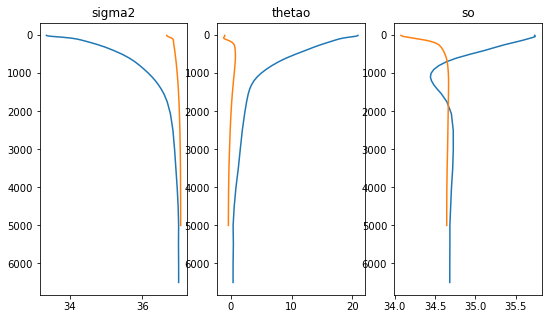

In [35]:
north = {'yh':-30}
south = {'yh':-65}
fig,ax = plt.subplots(figsize=(9,5),ncols=3)
a=0
for variable in ['sigma2','thetao','so']:
    ax[a].plot(ds[variable].mean(['time','xh']).sel(north,method='nearest'),ds['z_l'])
    ax[a].plot(ds[variable].mean(['time','xh']).sel(south,method='nearest'),ds['z_l'])
    ax[a].invert_yaxis()
    ax[a].set_title(variable)
    a+=1

### Buoyancy forcing

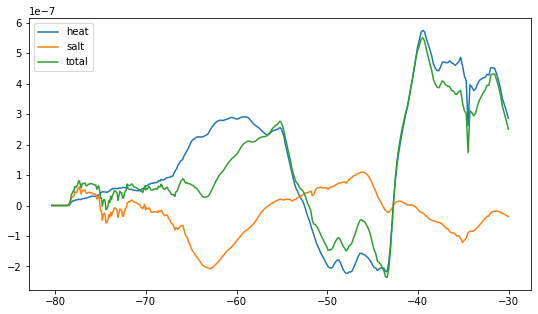

In [36]:
fig,ax = plt.subplots(figsize=(9,5))
for term in densitytendency.data_vars:
    ax.plot(ds['yh'],densitytendency[term].sum('z_l').mean(['time','xh']),label=term)
ax.legend()